In this document we'll look at a wine dataset.

In [ ]:
import pandas as pd
from brent.graph import DAG
from brent.query import Query
from brent.common import quantize_column

In [15]:
df = (pd.read_csv("../data/wine_2012.csv")
      .assign(grade=lambda d: quantize_column(d['score'], 2))
      .rename(lambda d: d.replace(".", "_"), axis="columns"))
df.head()

,judge,flight,wine,score,wine_amer,judge_amer,grade
0,Jean-M Cardebat,white,A1,10.0,1,0,1
1,Jean-M Cardebat,white,B1,13.0,1,0,1
2,Jean-M Cardebat,white,C1,14.0,0,0,2
3,Jean-M Cardebat,white,D1,15.0,0,0,2
4,Jean-M Cardebat,white,E1,8.0,1,0,1


In [17]:
df.grade.value_counts()

2    117
1     63
Name: grade, dtype: int64

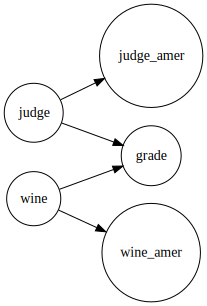

In [22]:
dag = (DAG(df[['judge', 'wine', 'grade', 'wine_amer', 'judge_amer']])
 .add_edge("judge", "grade")
 .add_edge("judge", "judge_amer")
 .add_edge("wine", "grade")
 .add_edge("wine", "wine_amer"))

dag.plot()

Yep, this is a bug.

In [23]:
for i,j in zip([0,0,1,1], [0,1,0,1]):
    print(f"american wine={i}, american judge={j}")
    print(Query(dag).given(wine_amer=i, judge_amer=j).infer()['grade'])

american wine=0, american judge=0
{1: 0.411764705882353, 2: 0.5882352941176471}
american wine=0, american judge=1
{1: 0.26315789473684215, 2: 0.7368421052631582}
american wine=1, american judge=0
{1: 0.39999999999999997, 2: 0.6}
american wine=1, american judge=1
{1: 0.20833333333333337, 2: 0.7916666666666665}
